# HW 1

Problem: 

The fraud data refers to information collected and analyzed to identify fraudulent activities, such as illegal financial transactions, embezzlement, identity theft, and other forms of deception. Our team will work on this data and will analyze the information to uncover patterns and anomalies that may indicate fraudulent behavior, and then develop strategies to prevent and mitigate these types of incidents. The problem that we team will be working on is to develop an effective method of detecting fraud and protecting against financial losses, while also ensuring that legitimate transactions are not impeded. This will involve machine learning algorithms, and other tools to identify high-risk activities, and then implementing appropriate measures to prevent fraud from occurring.


Source: https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

Data Description

This is a dataset containing information about online payment fraud, so that we can understand what type of transactions lead to fraud.We collected a dataset from Kaggle, which contains historical information about fraudulent transactions which can be used to detect fraud in online payments. Below are all the columns from the dataset we’re using here:



step: represents a unit of time where 1 step equals 1 hour

type: type of online transaction

amount: the amount of the transaction

nameOrig: customer starting the transaction

oldbalanceOrg: balance before the transaction

newbalanceOrig: balance after the transaction

nameDest: recipient of the transaction

oldbalanceDest: initial balance of recipient before the transaction

newbalanceDest: the new balance of recipient after the transaction

isFraud: fraud transaction


# Teacher Note

your feature set seemed a little insufficient to me to do a business strategy. However, its not a big problem, the goal is the robust implementation of feature engineering, selection and model fit. Make sure you utilize imbalance dataset problems (u can check what other people use for this from the literature review). If you had some text data we could even apply a graph analysis for fraud. Please do a literature review for that as well

# HW 2

The team will pick 3 journal papers from (preferably) the top-ranked business journals, such as SMJ, Management Science, MISQ ISR, Marketing Science, and Academy of Management Journal (AMJ), about the selected topic and will discuss/compare the empirical validation methods used in these papers for hypothesis testing.

For example, if your team picks a topic about predicting market volatility and uses the Kaggle dataset to analyze this use case, they can review/compare the implementation on this paper that adopts a quantile regression approach on a similar use case. Google Scholar should be a great source to access these articles.

Another example could be as follows: Assume you picked a topic to analyze Employee Churn Prediction in a company. You can search for articles about churn prediction and analyze how different models were adopted to validate the empirical results and hypotheses proposed in those papers.

The goal of this stage is to explore the usage of the techniques learned in class for an academic article publication.

Please review the Final Project information and Final Project Guidelines before completing this assignment.

Submission: 3 pages of analysis (1 paper per page). Each page should include the problem covered in the paper, proposed models for solutions, and compare the implementation with your own project topic (similarities, relevance, adaptability of proposed model to your project).

# HW 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('onlinefraud.csv')

# 1. Getting familiar with the data

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<AxesSubplot:>

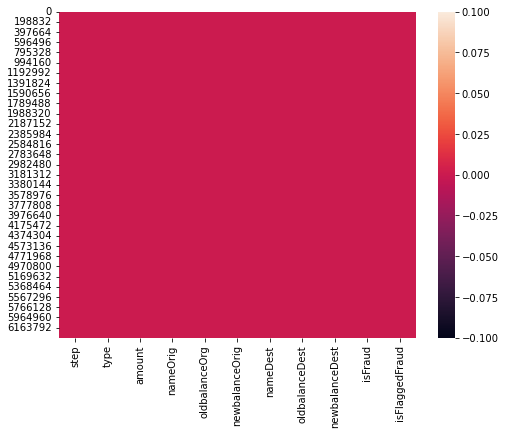

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())

In [7]:
df.shape

(6362620, 11)

# 2. Exploratory Data Analysis (EDA)

Univariate Analysis

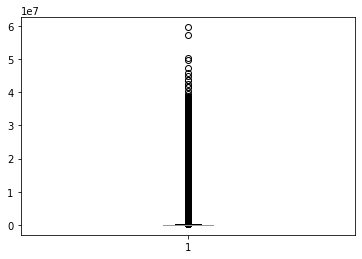

In [8]:
# Plot a box plot for the "amount" column
plt.boxplot(df['oldbalanceOrg'])
plt.show()

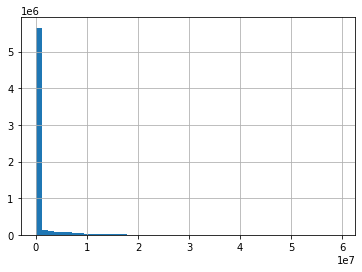

In [9]:
# Plot a histogram for the "amount" column
df['oldbalanceOrg'].hist(bins=50)
plt.show()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


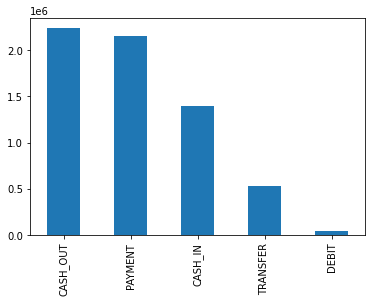

In [10]:
# Frequency distribution of "type" column
print(df['type'].value_counts())

# Bar plot of "type" column
df['type'].value_counts().plot.bar()
plt.show()

0    6354407
1       8213
Name: isFraud, dtype: int64


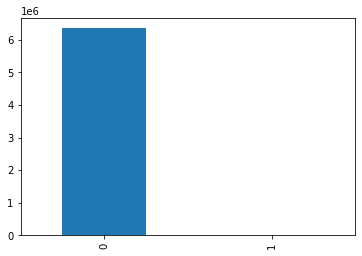

In [11]:
# Frequency distribution of "isFraud" column
print(df['isFraud'].value_counts())

# Bar plot of "isFraud" column
df['isFraud'].value_counts().plot.bar()
plt.show()

Text(0, 0.5, 'Count')

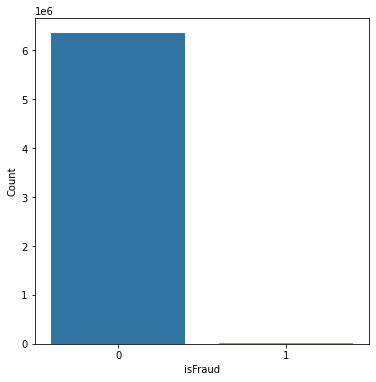

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(df['isFraud'])
plt.xlabel('isFraud')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

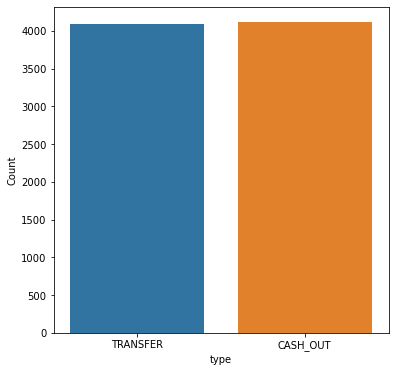

In [13]:
plt.figure(figsize=(6,6))
df_default = df[df['isFraud']==1]
sns.countplot(df_default['type'])
plt.xlabel('type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

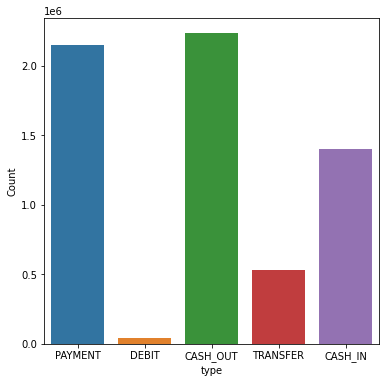

In [14]:
plt.figure(figsize=(6,6))
df_default = df[df['isFraud']==0]
sns.countplot(df_default['type'])
plt.xlabel('type')
plt.ylabel('Count')

In [15]:
df.groupby('type')['step'].count()

type
CASH_IN     1399284
CASH_OUT    2237500
DEBIT         41432
PAYMENT     2151495
TRANSFER     532909
Name: step, dtype: int64

Text(0, 0.5, 'Count')

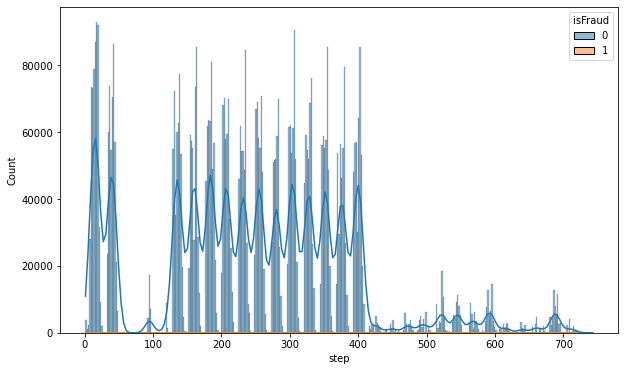

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "step", kde = True, hue = "isFraud")
plt.xlabel('step')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

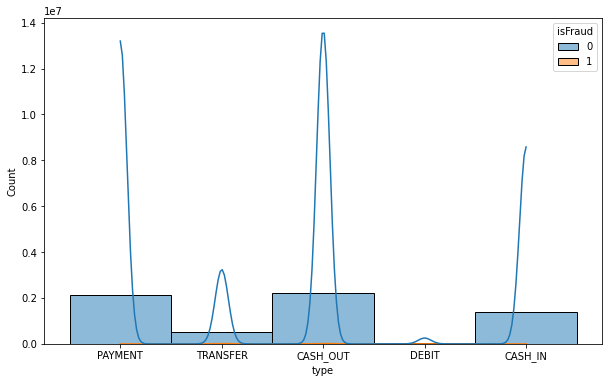

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data = df, x = "type", kde = True, hue = "isFraud")
plt.xlabel('type')
plt.ylabel('Count')

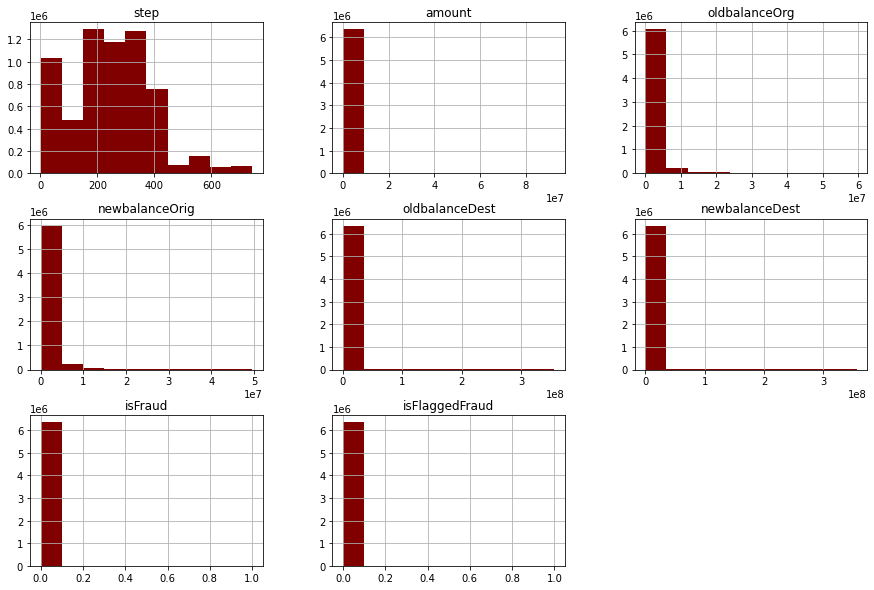

In [18]:
fig = plt.figure(figsize = (15, 10));
ax = fig.gca();
df.hist(ax = ax, color = 'maroon')
pass

In [19]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [20]:
abs(df.corr().iloc[:,7]).sort_values(ascending=False)

isFlaggedFraud    1.000000
isFraud           0.044109
amount            0.012295
oldbalanceOrg     0.003835
newbalanceOrig    0.003776
step              0.003277
newbalanceDest    0.000529
oldbalanceDest    0.000513
Name: isFlaggedFraud, dtype: float64

Bivariate Analysis

In [21]:
# Create a contingency table of "isFraud" and "type"
contingency_table = pd.crosstab(df['isFraud'], df['type'])

# Perform a chi-square test
from scipy.stats import chi2_contingency
stat, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square statistic:", stat)
print("P-value:", p)

Chi-square statistic: 22082.53571319108
P-value: 0.0


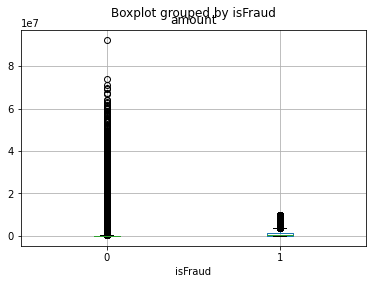

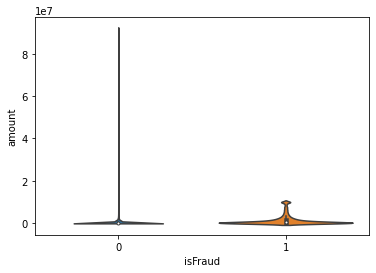

In [22]:
# Box plot of "amount" for "isFraud" categories
df.boxplot(column='amount', by='isFraud')
plt.show()

# Violin plot of "amount" for "isFraud" categories
import seaborn as sns
sns.violinplot(x='isFraud', y='amount', data=df)
plt.show()

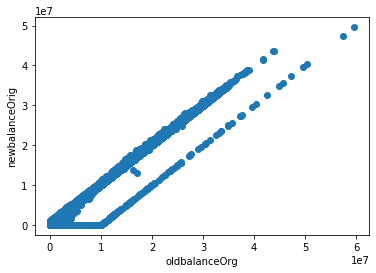

Correlation coefficient: 0.9988027631715821
P-value: 0.0


In [23]:
# Scatter plot of "oldbalanceOrg" vs "newbalanceOrig"
plt.scatter(df['oldbalanceOrg'], df['newbalanceOrig'])
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.show()

# Calculate the correlation coefficient
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['oldbalanceOrg'], df['newbalanceOrig'])
print("Correlation coefficient:", corr)
print("P-value:", p_value)

Multivariate Analysis

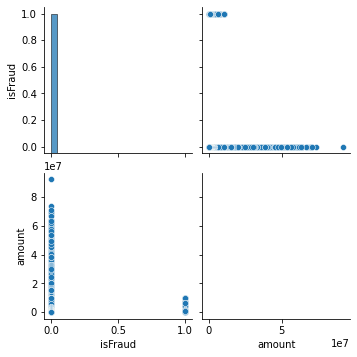

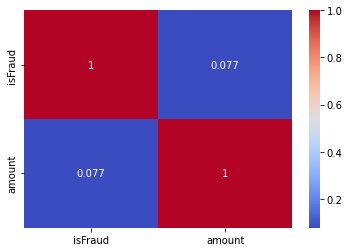

In [24]:
# Scatter plot matrix of "isFraud", "type", and "amount"
sns.pairplot(df[['isFraud', 'type', 'amount']])
plt.show()

# Heatmap of correlation between "isFraud", "type", and "amount"
corr_matrix = df[['isFraud', 'type', 'amount']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

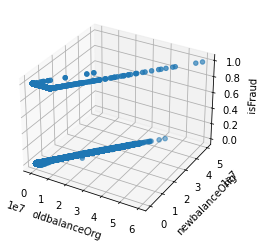

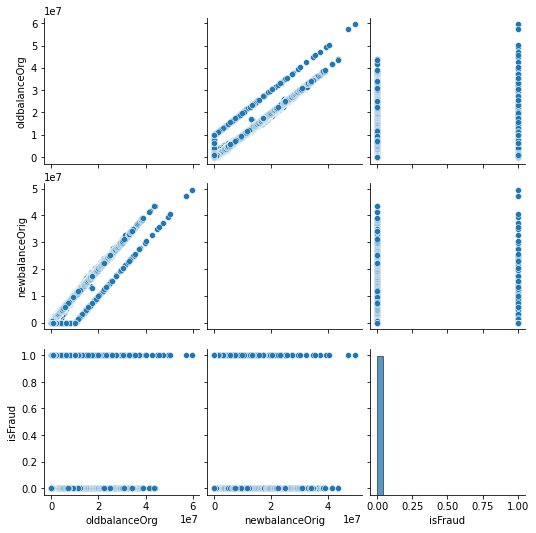

In [25]:
# 3D scatter plot of "oldbalanceOrg", "newbalanceOrig", and "isFraud"
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['oldbalanceOrg'], df['newbalanceOrig'], df['isFraud'])
ax.set_xlabel('oldbalanceOrg')
ax.set_ylabel('newbalanceOrig')
ax.set_zlabel('isFraud')
plt.show()

# Scatter plot matrix of "oldbalanceOrg", "newbalanceOrig", and "isFraud"
sns.pairplot(df[['oldbalanceOrg', 'newbalanceOrig', 'isFraud']])
plt.show()

Outlier Detection

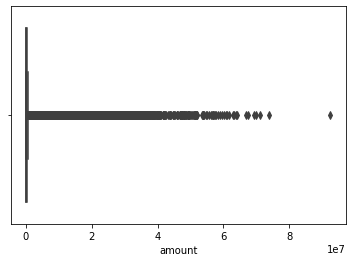

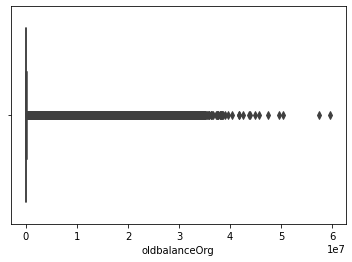

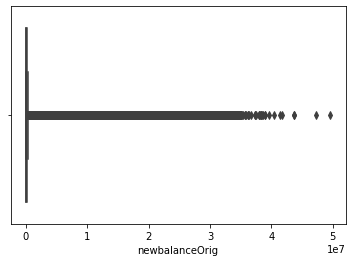

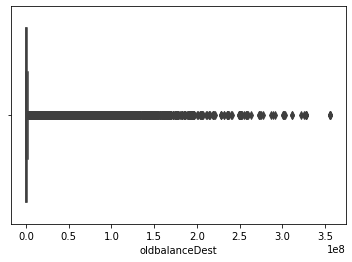

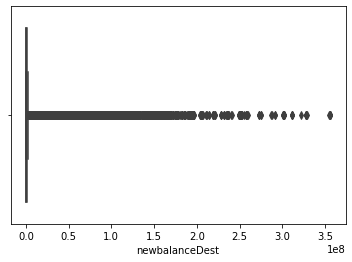

In [26]:
# Box plot of "amount"
sns.boxplot(x=df['amount'])
plt.show()

# Box plot of "oldbalanceOrg"
sns.boxplot(x=df['oldbalanceOrg'])
plt.show()

# Box plot of "newbalanceOrig"
sns.boxplot(x=df['newbalanceOrig'])
plt.show()

# Box plot of "oldbalanceDest"
sns.boxplot(x=df['oldbalanceDest'])
plt.show()

# Box plot of "newbalanceDest"
sns.boxplot(x=df['newbalanceDest'])
plt.show()

A z-score greater than 3 or less than -3 is considered an outlier.

In [27]:
# Calculate the z-score for "amount"
from scipy.stats import zscore
df['amount_zscore'] = zscore(df['amount'])
outliers = df[(df['amount_zscore'] > 3) | (df['amount_zscore'] < -3)]
print(outliers)

         step      type      amount     nameOrig  oldbalanceOrg  \
359         1  TRANSFER  2421578.09   C106297322           0.00   
375         1  TRANSFER  2545478.01  C1057507014           0.00   
376         1  TRANSFER  2061082.82  C2007599722           0.00   
1153        1  TRANSFER  3776389.09   C197491520           0.00   
1202        1  TRANSFER  2258388.15    C12139181           0.00   
...       ...       ...         ...          ...            ...   
6362584   741  TRANSFER  5674547.89   C992223106     5674547.89   
6362598   742  TRANSFER  4009058.39  C1044665079     4009058.39   
6362599   742  CASH_OUT  4009058.39  C1970706589     4009058.39   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
359                0.00  C1590550415      8515645.77     19169204.93        0   
375                0.00  C1590550

Data points that are more than 1.5 times the IQR below the first quartile or above the third quartile are considered outliers

In [28]:
# Calculate the IQR for "oldbalanceOrg"
Q1 = df['oldbalanceOrg'].quantile(0.25)
Q3 = df['oldbalanceOrg'].quantile(0.75)
IQR = Q3 - Q1

# Identify the outliers
outliers = df[(df['oldbalanceOrg'] < (Q1 - 1.5 * IQR)) | (df['oldbalanceOrg'] > (Q3 + 1.5 * IQR))]
print(outliers)

         step      type      amount     nameOrig  oldbalanceOrg  \
14          1   PAYMENT     4098.78  C1026483832      503264.00   
37          1   PAYMENT     2791.42   C923341586      300481.00   
38          1   PAYMENT     7413.54  C1470868839      297689.58   
62          1     DEBIT     8727.74   C166694583      882770.00   
63          1   PAYMENT     2599.46   C885910946      874042.26   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
14            499165.22  M1635378213            0.00            0.00        0   
37            297689.58   M107994

Feature Engineering

In [29]:
df['amount_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [30]:
df['hour'] = pd.to_datetime(df['step'], unit='h').dt.hour

In [31]:
def account_type(name):
    if name.startswith('C'):
        return 'customer'
    elif name.startswith('M'):
        return 'merchant'
    else:
        return 'unknown'

df['account_type'] = df['nameOrig'].apply(account_type)

In [ ]:
freq = df.groupby('nameOrig')['step'].diff().fillna(0)
df['transaction_freq'] = freq.apply(lambda x: 1 if x == 0 else 1/x)

In [ ]:
df['transaction_volume'] = df.groupby('nameOrig')['amount'].cumsum()

In [ ]:
df.head()

More EDA with the Feature Engineering data points

In [ ]:
sns.boxplot(x='isFraud', y='amount_diff', data=df)
plt.title('Transaction Amount Difference vs. Fraudulent Transactions')

In [ ]:
sns.countplot(x='account_type', hue='isFraud', data=df)
plt.title('Account Type vs. Fraudulent Transactions')

In [ ]:
sns.scatterplot(x='transaction_freq', y='isFraud', data=df)
plt.title('Transaction Frequency vs. Fraudulent Transactions')

# 3. Splitting features and target variable

In [ ]:
df.columns

In [ ]:
X = df.drop(columns=['isFraud'])

In [ ]:
y = df['isFraud']

# 4. Get dummies

In [ ]:
X = pd.get_dummies(X, columns=['type', 'account_type',], drop_first=True)

In [ ]:
X['nameOrig'] = X['nameOrig'].str[1:]
X['nameDest'] = X['nameDest'].str[1:]

In [ ]:
X.head()

# 5. Split into train test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_res, y_res=sm.fit_resample(X,y)

In [ ]:
y_res.head()

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

# Plot the distribution of the original data
sns.countplot(x=y, ax=axs[0])
axs[0].set_title('Distribution of target variable (before SMOTE)')

# Plot the distribution of the resampled data
sns.countplot(x=y_res, ax=axs[1])
axs[1].set_title('Distribution of target variable (after SMOTE)')

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#split balanced datasets
xb_train,xb_test,yb_train,yb_test=train_test_split(x_res,y_res,test_size=0.2,random_state=42)

# 6. Feature Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#scale balanced data
scaler_b=StandardScaler()
scaler_b.fit(xb_train)
xb_train_scaled=scaler_b.transform(xb_train)
xb_test_scaled=scaler_b.transform(xb_test)

# 7. Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import svm

Logistic Regression

In [ ]:
lr_b = LogisticRegression(random_state=42)
lr_b.fit(xb_train_scaled, yb_train)
y_pred_lr_b = lr_b.predict(xb_test_scaled)

In [ ]:
print("\nConfusion Matrix for Logistic Regression Model with balanced dataset:\n\n", confusion_matrix(yb_test, y_pred_lr_b))
print("\nClassification Report for Logistic Regression Model with balanced dataset:\n\n", classification_report(yb_test, y_pred_lr_b))

Random Forest

In [ ]:
rf_b = RandomForestClassifier(random_state=42, max_depth=10)
rf_b.fit(xb_train, yb_train)
y_pred_rf_b=rf_b.predict(xb_test)

In [ ]:
print("\nConfusion Matrix for Random Forest Model with balanced dataset:\n\n", confusion_matrix(yb_test, y_pred_rf_b))
print("\nClassification Report for Random Forest Model with balanced dataset:\n\n", classification_report(yb_test, y_pred_rf_b))

In [ ]:
features = X.columns
importances_b = rf_b.feature_importances_
indices = np.argsort(importances_b)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances_b[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

K Nearest Neighbors

In [ ]:
knn_b=KNeighborsClassifier(3)
knn_b.fit(xb_train,yb_train)

In [ ]:
knn_b_hat=knn_b.predict(xb_test)

In [ ]:
print("\nConfusion Matrix for KNN Model with balanced dataset:\n\n", confusion_matrix(yb_test.values,knn_b_hat))
print("\nClassification Report for KNN Model with balanced dataset:\n\n",classification_report(yb_test.values,knn_b_hat))

SVM

In [ ]:
clf_b=svm.SVC(kernel='rbf',C=10,gamma=0.01)

In [ ]:
clf_b.fit(xb_train,yb_train)

In [ ]:
svm_b=clf_b.predict(X_test)

In [ ]:
print("\nConfusion Matrix for SVM Model with balanced dataset:\n\n",confusion_matrix(y_test.values,svm_b))
print("\nClassification Report for SVM Model with balanced dataset:\n\n",classification_report(y_test.values,svm_b))

# 6. Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracy_lr=cross_val_score(lr,X_train,y_train,scoring='accuracy',cv=10)
score_lr=accuracy_score(y_test,y_pred_lr)
dif_lr=(accuracy_lr.mean()-score_lr)/score_lr

In [ ]:
print("The logistic regression model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_lr.mean()))
print("The evaluation accuracy score for logistic model is {}".format(score_lr))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_lr))

In [ ]:
accuracy_rf=cross_val_score(rf,X_train,y_train,scoring='accuracy',cv=10)
score_rf=accuracy_score(y_test,y_pred_rf)
dif_rf=(accuracy_rf.mean()-score_rf)/score_rf

In [ ]:
print("The random forest model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_rf.mean()))
print("The evaluation accuracy score for random forest is {}".format(score_rf))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_rf))

In [ ]:
accuracy_knn=cross_val_score(knn,X_train,y_train,scoring='accuracy',cv=10)
score_knn=accuracy_score(y_test,knn_b_hat)
dif_knn=(accuracy_knn.mean()-score_knn)/score_knn

In [ ]:
print("The knn model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_knn.mean()))
print("The evaluation accuracy score for knn is {}".format(score_knn))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_knn))

In [ ]:
accuracy_svm=cross_val_score(clf,X_train,y_train,scoring='accuracy',cv=10)
score_svm=accuracy_score(y_test,svm_b)
dif_svm=(accuracy_svm.mean()-score_svm)/score_svm

In [ ]:
print("The svm model's mean accuracy score after cross validation on training dataset is {}".format(accuracy_svm.mean()))
print("The evaluation accuracy score for svm is {}".format(score_svm))
print("The percentage difference between cross validation and evaluation is {}, meaning our model is not overfitting or underfitting".format(dif_svm))

In [ ]:
print("Accuracy of logistic regression with Cross Validation is:",accuracy_lr.mean() * 100)
print("Accuracy of random forest with Cross Validation is:",accuracy_rf.mean() * 100)
print("Accuracy of knn with Cross Validation is:",accuracy_knn.mean() * 100)
print("Accuracy of svm with Cross Validation is:",accuracy_svm.mean() * 100)

# 7. Selection the Best model and Explain it using success metrics

ROC AUC( i.e Area Under Curve). The metric refers to the probability that a classifier will rank a randomly chosed positive instance higher than a randomly chosen negative one. If ROC AUC is more closer to 1, then the model is better performed.

AUC LR

In [ ]:
AUC_b_lr=roc_auc_score(y_test.values, y_pred_lr_b)
print("The auc for balanced dataset on Logistic Regression is {}".format(AUC_b_lr))

AUC KNN

In [ ]:
AUC_b_knn=roc_auc_score(y_test.values,knn_b_hat)
AUC_b_knn

AUC SVM

In [ ]:
AUC_b_svm=roc_auc_score(y_test.values,svm_b)
AUC_b_svm

AUC RF

In [ ]:
AUC_b_rf=roc_auc_score(y_test.values, y_pred_rf_b)
print("The auc for balanced dataset on Random Forest is {}".format(AUC_b_lr))

Log Loss function. It measures how well a function of the predicted probability and the actual label. The log loss is a logarithmic function that penalizes false positives and false negatives. Ideally, smaller the log loss value is, more perfect the model is

LL LR

In [ ]:
ll_b_lr=log_loss(y_test.values, y_pred_lr_b)
print("The log_loss for balanced dataset on Logistic Regression is {}".format(ll_b_lr))

LL KNN

In [ ]:
ll_b_knn=log_loss(y_test.values,knn_b_hat)
ll_b_knn

LL RF

In [ ]:
ll_b_rf=log_loss(y_test.values, y_pred_rf_b)
print("The log_loss for balanced dataset on Logistic Regression is {}".format(ll_b_rf))

LL SVM

In [ ]:
ll_b_svm=log_loss(y_test.values,svm_b)
ll_b_svm

# Visualization of the metrics

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
precision_lr,recall_lr,fscore_lr,support_lr=score(y_test,y_pred_lr_b)
precision_rf,recall_rf,fscore_rf,support_rf=score(y_test,y_pred_rf_b)

In [ ]:
prec=[precision_lr.mean(),precision_rf.mean(),precision_knn.mean(),precision_svm.mean()]
rec=[recall_lr.mean(),recall_rf.mean(),recall_knn.mean(),recall_svm.mean()]
fsco=[fscore_lr.mean(),fscore_rf.mean(),fscore_knn.mean(),fscore_svm.mean()]
accu=[accuracy_lr.mean(),accuracy_rf.mean(),accuracy_knn.mean(),accuracy_svm.mean()]
auc=[AUC_b_lr,AUC_b_rf,AUC_b_knn,AUC_b_svm]
log_loss=[ll_b_lr,ll_b_rf,ll_b_knn,ll_b_svm]

In [ ]:
barWidth=0.1
fig=plt.subplots(figsize=(12,8))
br1=np.arange(len(prec))
br2=[x+barWidth for x in br1]
br3=[x+barWidth for x in br2]
br4=[x+barWidth for x in br3]
br5=[x+barWidth for x in br4]
#br6=[x+barWidth for x in br5]
plt.bar(br1,prec, color='r',width=barWidth,edgecolor='grey',label='Precision Score')
plt.bar(br2,rec,color='g',width=barWidth,edgecolor='grey',label='Recall Score')
plt.bar(br3,fsco, color='b',width=barWidth,edgecolor='grey',label='F score Score')
plt.bar(br4,accu, color='black',width=barWidth,edgecolor='grey',label='Accuracy by Cross Validation')
plt.bar(br5,auc,color='orange',width=barWidth,edgecolor='grey',label='Area Under Curve Score')
#plt.bar(br6,log_loss,color='pink',width=barWidth,edgecolor='grey',label='Log Loss Score')
plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Students passed',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','KNN','SVM'])

plt.legend(fontsize=10,loc='center')
plt.show()

In [ ]:
barWidth_1=0.1
fig=plt.subplots(figsize=(12,8))
br6=np.arange(len(log_loss))

plt.bar(br6,log_loss, color='r',width=barWidth,edgecolor='grey',label='Log Loss Score')

plt.xlabel('Branch',fontweight='bold',fontsize=15)
plt.ylabel('Students passed',fontweight='bold',fontsize=15)
plt.xticks([r+barWidth for r in range(len(prec))],['Logistic Regression','Random Forest','KNN','SVM'])

plt.legend(fontsize=15,loc='upper right')
plt.show()